In [63]:
import os
import pickle
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
rootdir = 'D:/licencjat/bachelors_thesis_movie_clustering_codes/raw_data/boxoffice_data'
movies_data_dict = {}

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        pickle_path = os.path.join(subdir, file)
        with open(pickle_path, 'rb') as f:
            movie_data = pickle.load(f)
        movie_title = subdir.replace('D:/licencjat/bachelors_thesis_movie_clustering_codes/raw_data/boxoffice_data\\', '')
        movies_data_dict[movie_title] = movie_data

In [3]:
# tabele nie mają określonej kolejności, więc sprawdzam, czy mogę wyszukiwać tabeli z dziennym boxoffice po istnieniu kolumny 'Days'.


for key in movies_data_dict.keys():
    how_many_Days_in_columns = 0
    movie = movies_data_dict[key]
    for table in movie:
        if 'Days' in table.columns:
            how_many_Days_in_columns+=1
    if how_many_Days_in_columns != 1:
        print(how_many_Days_in_columns)

# wniosek: print nigdy nie następuje, więc w danych jest tylko jedna tabela z kolumną 'Days'. Oznacza to, że mogę tak wyszukiwać tę tabelę.

In [4]:
# sprawdzam jaka jest najdłuższa tabela, żeby ustalić rozmiar dataframe, który utworzę

only_daily_boxoffice_df_dict = {}
days_in_cinemas_max = 0
for key in movies_data_dict.keys():
    how_many_Days_in_columns = 0
    movie = movies_data_dict[key]
    for table in movie:
        if 'Days' in table.columns:
            only_daily_boxoffice_df_dict[key] = table
            if len(table) > days_in_cinemas_max:
                days_in_cinemas_max = len(table)
print(days_in_cinemas_max)

603


In [5]:
# wrzucam wszystkie daty do jednego dataframe, żeby ręcznie wychwycić wszystkie rereleasy i je spisać

daily_boxoffice_all_movies_dates_df = pd.DataFrame(index = np.arange(days_in_cinemas_max))
daily_boxoffice_all_movies_dates_df

""
0
1
2
3
4
...
598
599
600
601


In [6]:
for key in only_daily_boxoffice_df_dict:
    movie = only_daily_boxoffice_df_dict[key]
    daily_boxoffice_all_movies_dates_df[key] = movie['Days']

daily_boxoffice_all_movies_dates_df

,2012,22_Jump_Street,300,Aladdin,Alice_in_Wonderland,Alvin_and_the_Chipmunks,Alvin_and_the_Chipmunks_The_Squeakquel,American_Pie_2,American_Sniper,Anger_Management,...,Wild_Hogs,Wonder_Woman,World_War_Z,Wreck-It_Ralph,X-Men_2,X-Men_Days_of_Future_Past,X-Men_Origins_Wolverine,X-Men_The_Last_Stand,xXx,Zootopia
0,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,NaN,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN
1,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0
2,3.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,2.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,2.0
3,4.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,3.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,3.0
4,5.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Jak widać niektóre filmy (np. Aladdin) mają na początku informację o sumie zebranej przedsprzedaży. Te pieniądze i tak zawsze potem są dodawane do pierwszego dnia, kiedy film jest powszednie emitowany, więc trzeba pousuwać wiersze o przedsprzedaży.

In [47]:
daily_boxoffice_all_movies_dates_df_without_presales = pd.DataFrame(index = np.arange(days_in_cinemas_max))
daily_boxoffice_gross_without_presales = pd.DataFrame(index = np.arange(days_in_cinemas_max))
for key in only_daily_boxoffice_df_dict:
    movie = only_daily_boxoffice_df_dict[key]
    if math.isnan(movie['Days'][0]):
        movie.drop(index=0, inplace=True)
        movie.reset_index(drop=True, inplace=True)
    daily_boxoffice_all_movies_dates_df_without_presales[key] = movie['Days']
    daily_boxoffice_gross_without_presales[key] = movie['Gross']

In [48]:
first_month_boxoffice_days = daily_boxoffice_all_movies_dates_df_without_presales.iloc[:31]
first_month_boxoffice_gross = daily_boxoffice_gross_without_presales.iloc[:31]

first_month_boxoffice_days

,2012,22_Jump_Street,300,Aladdin,Alice_in_Wonderland,Alvin_and_the_Chipmunks,Alvin_and_the_Chipmunks_The_Squeakquel,American_Pie_2,American_Sniper,Anger_Management,...,Wild_Hogs,Wonder_Woman,World_War_Z,Wreck-It_Ralph,X-Men_2,X-Men_Days_of_Future_Past,X-Men_Origins_Wolverine,X-Men_The_Last_Stand,xXx,Zootopia
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
4,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
5,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
6,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
7,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
8,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
9,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


In [49]:
#sprawdzam czy wszystkie filmy mają cały zapisany każdy dzień z pierwszego miesiąca. Printuję tytuły filmów, w których coś się nie zgadza
# jest ich tylko 13, więc usunę je z danych.
correct_month = list(range(1, 32))

for col in first_month_boxoffice_days:
    if not (first_month_boxoffice_days[col]==correct_month).all():
        first_month_boxoffice_days.drop(columns=col, inplace=True)
        first_month_boxoffice_gross.drop(columns=col, inplace=True)

In [50]:
first_month_boxoffice_gross = first_month_boxoffice_gross.replace('\$', '', regex=True).replace(',','', regex=True).apply(pd.to_numeric)
first_month_boxoffice_gross

,2012,22_Jump_Street,300,Aladdin,Alice_in_Wonderland,Alvin_and_the_Chipmunks,Alvin_and_the_Chipmunks_The_Squeakquel,American_Pie_2,American_Sniper,Anger_Management,...,Wild_Hogs,Wonder_Woman,World_War_Z,Wreck-It_Ralph,X-Men_2,X-Men_Days_of_Future_Past,X-Men_Origins_Wolverine,X-Men_The_Last_Stand,xXx,Zootopia
0,23441334,25144490,28106731,31358935,40804962,13300713,18801277,16227500,240211,15772000,...,11250573,38247254,25196879,14232730,31247979,35511974,34433831,45102265,17311194,19500008
1,24698354,18726869,24680844,30013295,44209073,18883832,7912356,15278000,199481,17549412,...,17404024,35253398,22619334,21299342,32000629,29283650,29323711,31997843,15234194,31636202
2,17097926,13200086,18097726,30128699,31086988,12122872,13890011,13477000,215858,9296191,...,11044426,29750819,18595621,13506640,22310123,26028036,21300461,25650557,11960715,23927191
3,5114982,6830926,7617203,25305033,9008430,2641866,19842031,6508375,218117,2929000,...,2534712,11757063,7675366,2961132,6550000,19752944,5451023,20110492,5018000,4543674
4,4551284,7348908,6515299,12014982,7976108,2500599,15143373,5743125,166444,2956000,...,2532601,14342175,7981168,4750813,6038000,8207674,4632575,7289543,4807000,5374968
5,3642676,5774371,5822372,7455705,6772798,2776005,12096892,4686390,164201,2608000,...,2324128,9326011,6226175,1822013,4896000,5716351,4011209,5805109,3913000,3724824
6,3174501,5424480,5448153,6420525,6766997,3640910,12532035,4119735,124987,4170000,...,2324861,9145783,5627751,2061939,4602000,4968474,3471337,5375353,3609000,3908259
7,8137901,9325176,10072330,11855840,17281335,8439918,11777294,6330000,223080,10077747,...,7895404,15701461,8994726,7876082,12372432,9416247,8317835,10309481,7080045,12084077
8,11048199,10812737,12557442,17254688,26896938,10885757,8732013,7724000,233719,9566257,...,12702572,24003287,11643031,14871957,17108345,13794992,11231427,14328792,8638046,22696848
9,7224106,7323082,10247556,13730016,18535803,8853881,12998264,6205000,238862,5361584,...,7003315,18815924,9136868,10264757,10551383,9339859,6859026,9378974,6393330,16558962


In [51]:
# obliczone w https://www.usinflationcalculator.com/
#  The US Inflation Calculator uses the latest US government CPI data published on May 12, 2020 to adjust for inflation and calculate the cumulative inflation rate through April 2020. 

def adjust_to_inflation(dict_with_Date_column, boxoffice_df):
    inflation_dict = {'2001':1.45, '2002':1.43, '2003':1.39, '2004':1.36, '2005':1.31, '2006':1.27, '2007':1.24, '2008':1.19, '2009':1.20, '2010':1.18, '2011':1.14, '2012':1.12, '2013':1.10, '2014':1.08, '2015':1.08, '2016':1.07, '2017':1.05, '2018':1.02, '2019':1.00, '2020':1.00}

    boxoffice_df_inflation_adjusted = pd.DataFrame()
    for col in boxoffice_df:
        premiere_year = dict_with_Date_column[col]['Date'][0][-4:]
        boxoffice_df_inflation_adjusted[col] = boxoffice_df[col].multiply(inflation_dict[premiere_year])

    return boxoffice_df_inflation_adjusted

In [60]:
first_month_boxoffice_gross_inflation_adjusted = adjust_to_inflation(only_daily_boxoffice_df_dict, first_month_boxoffice_gross)
first_month_boxoffice_gross_inflation_adjusted

,2012,22_Jump_Street,300,Aladdin,Alice_in_Wonderland,Alvin_and_the_Chipmunks,Alvin_and_the_Chipmunks_The_Squeakquel,American_Pie_2,American_Sniper,Anger_Management,...,Wild_Hogs,Wonder_Woman,World_War_Z,Wreck-It_Ralph,X-Men_2,X-Men_Days_of_Future_Past,X-Men_Origins_Wolverine,X-Men_The_Last_Stand,xXx,Zootopia
0,28129600.8,27156049.20,34852346.44,31358935.0,48149855.16,16492884.12,22561532.4,23529875.00,259427.88,21923080.00,...,13950710.52,40159616.70,27716566.9,15940657.60,43434690.81,38352931.92,41320597.2,57279876.55,24755007.42,20865008.56
1,29638024.8,20225018.52,30604246.56,30013295.0,52166706.14,23415951.68,9494827.2,22153100.00,215439.48,24393682.68,...,21580989.76,37016067.90,24881267.4,23855263.04,44480874.31,31626342.00,35188453.2,40637260.61,21784897.42,33850736.14
2,20517511.2,14256092.88,22441180.24,30128699.0,36682645.84,15032361.28,16668013.2,19541650.00,233126.64,12921705.49,...,13695088.24,31238359.95,20455183.1,15127436.80,31011070.97,28110278.88,25560553.2,32576207.39,17103822.45,25602094.37
3,6137978.4,7377400.08,9445331.72,25305033.0,10629947.40,3275913.84,23810437.2,9437143.75,235566.36,4071310.00,...,3143042.88,12344916.15,8442902.6,3316467.84,9104500.00,21333179.52,6541227.6,25540324.84,7175740.00,4861731.18
4,5461540.8,7936820.64,8078970.76,12014982.0,9411807.44,3100742.76,18172047.6,8327531.25,179759.52,4108840.00,...,3140425.24,15059283.75,8779284.8,5320910.56,8392820.00,8864287.92,5559090.0,9257719.61,6874010.00,5751215.76
5,4371211.2,6236320.68,7219741.28,7455705.0,7991901.64,3442246.20,14516270.4,6795265.50,177337.08,3625120.00,...,2881918.72,9792311.55,6848792.5,2040654.56,6805440.00,6173659.08,4813450.8,7372488.43,5595590.00,3985561.68
6,3809401.2,5858438.40,6755709.72,6420525.0,7985056.46,4514728.40,15038442.0,5973615.75,134985.96,5796300.00,...,2882827.64,9603072.15,6190526.1,2309371.68,6396780.00,5365951.92,4165604.4,6826698.31,5160870.00,4181837.13
7,9765481.2,10071190.08,12489689.20,11855840.0,20391975.30,10465498.32,14132752.8,9178500.00,240926.40,14008068.33,...,9790300.96,16486534.05,9894198.6,8821211.84,17197680.48,10169546.76,9981402.0,13093040.87,10124464.35,12929962.39
8,13257838.8,11677755.96,15571228.08,17254688.0,31738386.84,13498338.68,10478415.6,11199800.00,252416.52,13297097.23,...,15751189.28,25203451.35,12807334.1,16656591.84,23780599.55,14898591.36,13477712.4,18197565.84,12352405.78,24285627.36
9,8668927.2,7908928.56,12706969.44,13730016.0,21872247.54,10978812.44,15597916.8,8997250.00,257970.96,7452601.76,...,8684110.60,19756720.20,10050554.8,11496527.84,14666422.37,10087047.72,8230831.2,11911296.98,9142461.90,17718089.34


2012


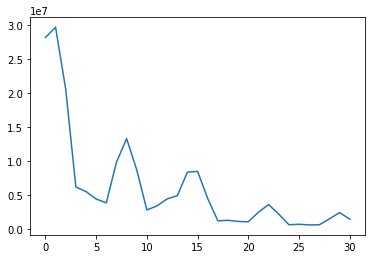

22_Jump_Street


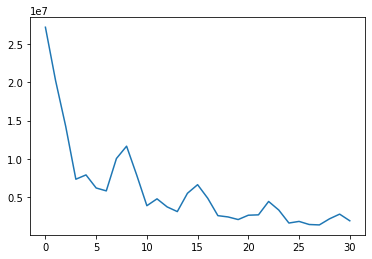

300


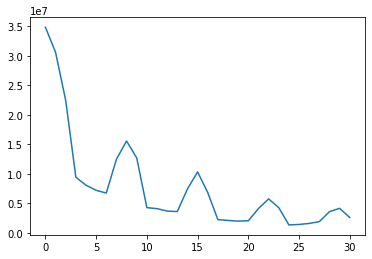

Aladdin


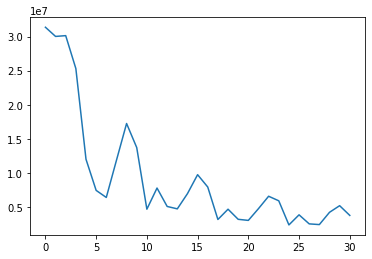

Alice_in_Wonderland


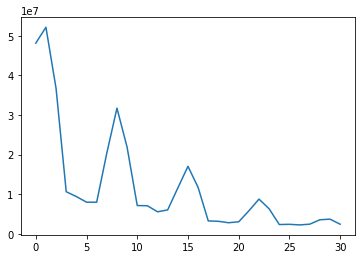

Alvin_and_the_Chipmunks


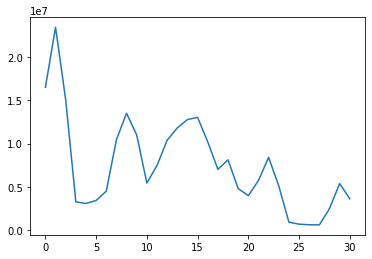

Alvin_and_the_Chipmunks_The_Squeakquel


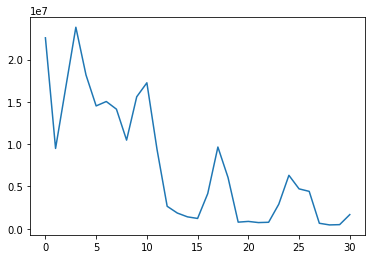

American_Pie_2


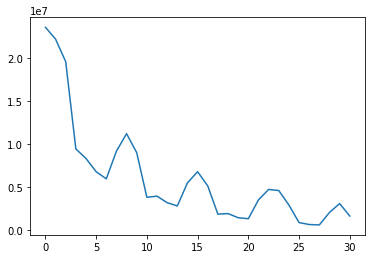

American_Sniper


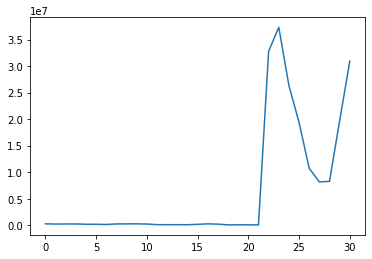

Anger_Management


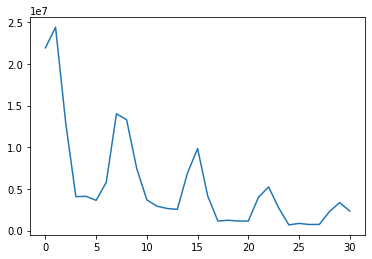

Ant-Man_and_the_Wasp


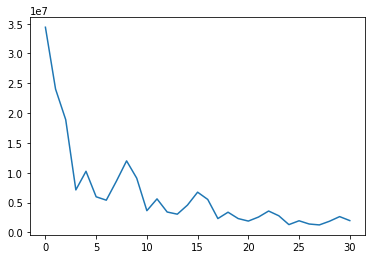

Aquaman


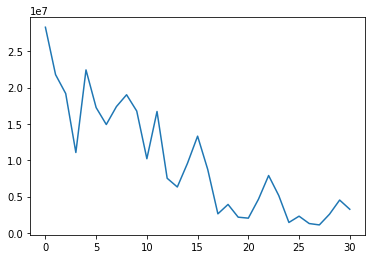

Austin_Powers_in_Goldmember


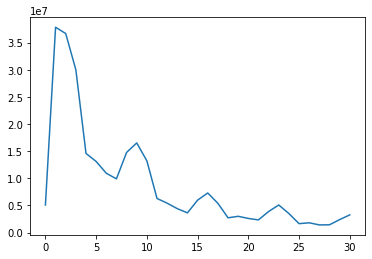

Avatar


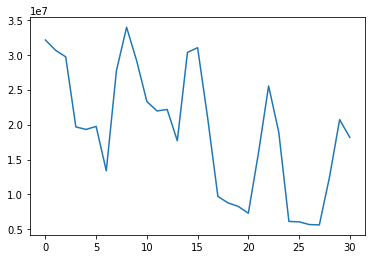

Avengers_Age_of_Ultron


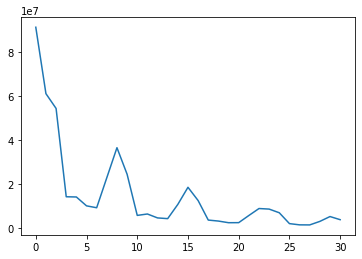

Avengers_Endgame


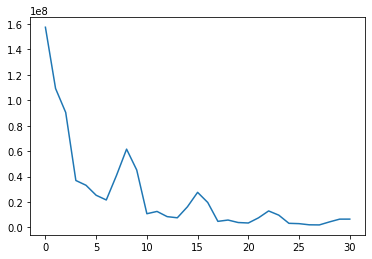

Avengers_Infinity_War


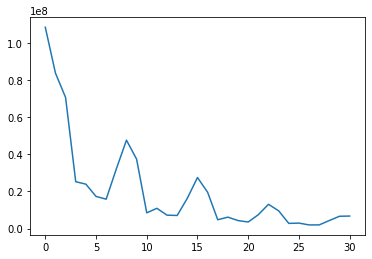

A_Star_is_Born


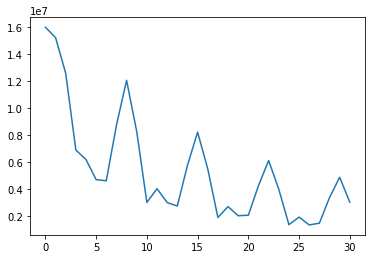

Bad_Boys_For_Life


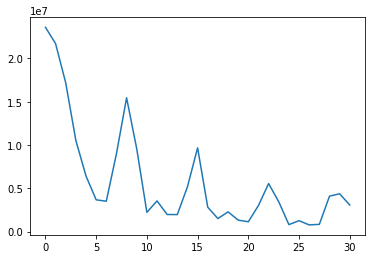

Batman_Begins


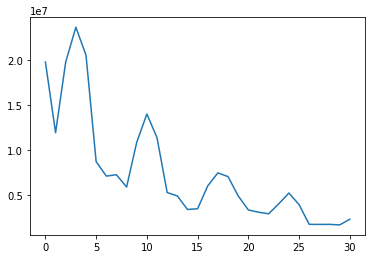

Batman_v_Superman_Dawn_of_Justice


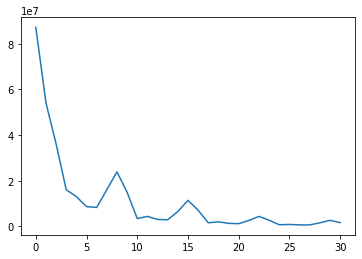

Beauty_and_the_Beast


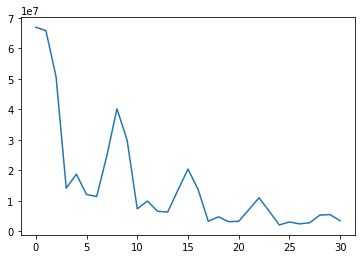

Big_Hero_6


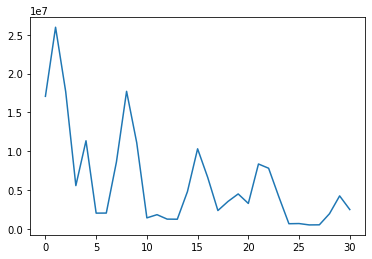

Black_Panther


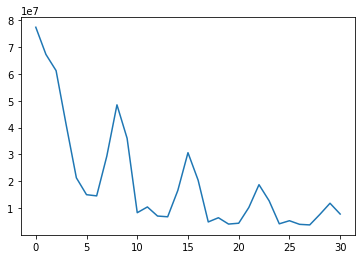

Bohemian_Rhapsody


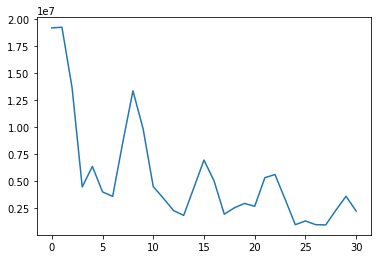

Brave


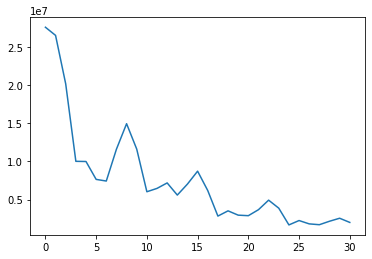

Bringing_Down_the_House


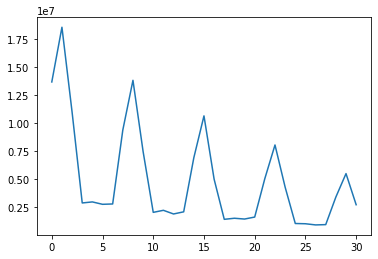

Bruce_Almighty


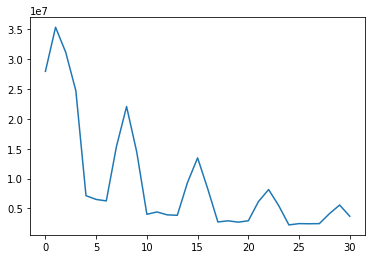

Captain_America_Civil_War


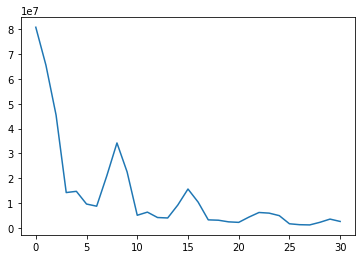

Captain_America_The_First_Avenger


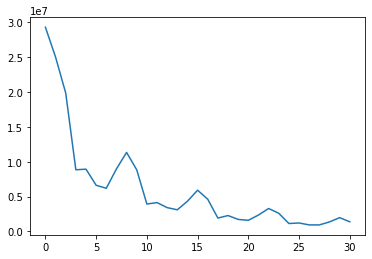

Captain_America_The_Winter_Soldier


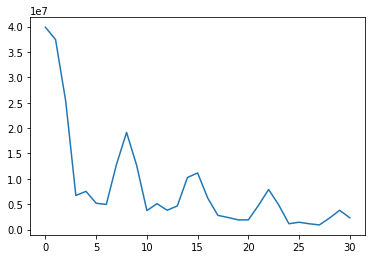

Captain_Marvel


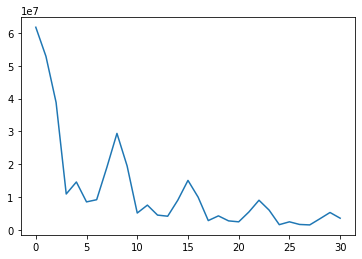

Cars


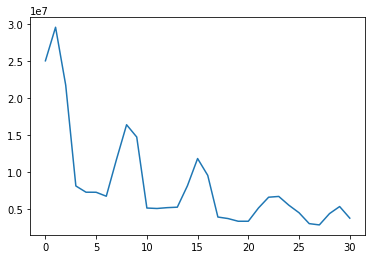

Cars_2


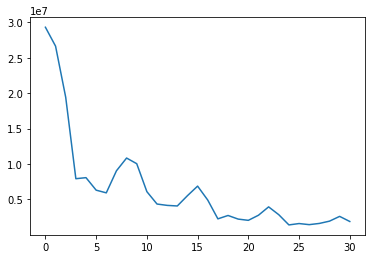

Casino_Royale


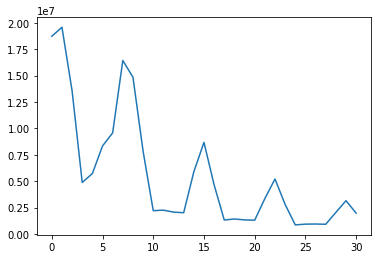

Catch_Me_if_You_Can


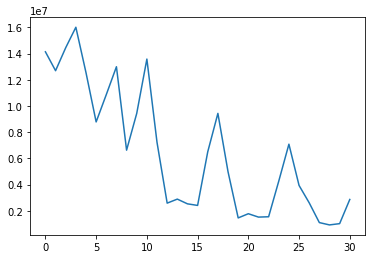

Charlie_and_the_Chocolate_Factory


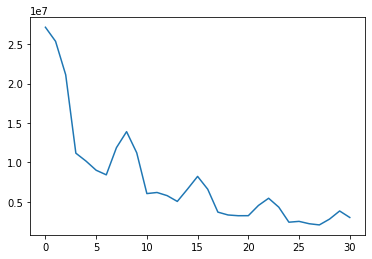

Cheaper_by_the_Dozen


KeyboardInterrupt: 

In [66]:
for col in first_month_boxoffice_gross_inflation_adjusted:
    plt.plot(first_month_boxoffice_gross_inflation_adjusted[col])
    print(col)
    plt.show()

In [68]:
first_month_boxoffice_gross_inflation_adjusted.to_csv('../preprocessed_data/first_month_boxoffice_gross_inflation_adjusted.csv')